<a href="https://colab.research.google.com/github/ToyTeX/NumericalNotebooks/blob/main/svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

U =
 [[ 0.7497 -0.6618]
 [ 0.6618  0.7497]]

Sigma =
 [[2.9208 0.    ]
 [0.     0.6847]]

V =
 [[ 0.2567 -0.9665]
 [ 0.9665  0.2567]]


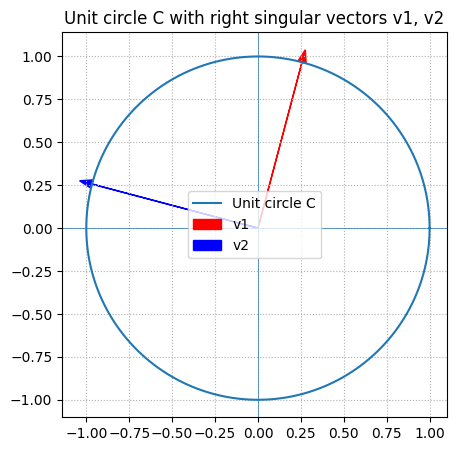

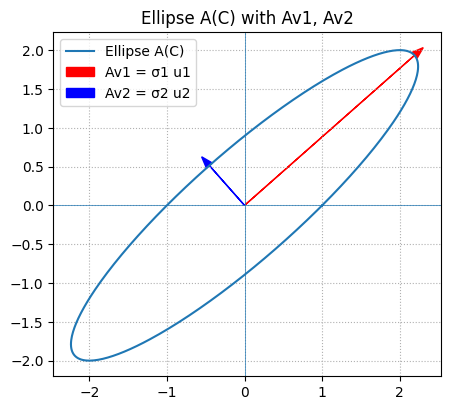

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix
A = np.array([[1., 2.],
              [0., 2.]])

# Compute SVD
U, s, Vt = np.linalg.svd(A)
V = Vt.T
Sigma = np.zeros_like(A)
np.fill_diagonal(Sigma, s)

# Print results (4 digits)
np.set_printoptions(precision=4, suppress=True)
print("U =\n", U)
print("\nSigma =\n", Sigma)
print("\nV =\n", V)

# Build unit circle
theta = np.linspace(0, 2*np.pi, 400)
circle = np.vstack([np.cos(theta), np.sin(theta)])  # 2xN

# Apply A to circle → ellipse
ellipse = A @ circle

# Singular vectors
v1, v2 = V[:,0], V[:,1]
Av1, Av2 = A @ v1, A @ v2

# --- Plot 1: Unit circle with v1,v2 ---
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(circle[0,:], circle[1,:], label="Unit circle C")
ax1.arrow(0,0, v1[0], v1[1], head_width=0.05, color='r', label="v1")
ax1.arrow(0,0, v2[0], v2[1], head_width=0.05, color='b', label="v2")
ax1.set_title("Unit circle C with right singular vectors v1, v2")
ax1.set_aspect('equal', 'box')
ax1.axhline(0, linewidth=0.5)
ax1.axvline(0, linewidth=0.5)
ax1.legend()
ax1.grid(True, linestyle=":")

# --- Plot 2: Ellipse with Av1, Av2 ---
fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.plot(ellipse[0,:], ellipse[1,:], label="Ellipse A(C)")
ax2.arrow(0,0, Av1[0], Av1[1], head_width=0.1, color='r', label="Av1 = σ1 u1")
ax2.arrow(0,0, Av2[0], Av2[1], head_width=0.1, color='b', label="Av2 = σ2 u2")
ax2.set_title("Ellipse A(C) with Av1, Av2")
ax2.set_aspect('equal', 'box')
ax2.axhline(0, linewidth=0.5)
ax2.axvline(0, linewidth=0.5)
ax2.legend()
ax2.grid(True, linestyle=":")

plt.show()


In [ ]:
# Find a vector x such that ||Ax||_2 / ||x||_2 = ||A||_2

# maximizing vector is the right singular vector corresponding to the largest singular value
x = V[:, 0]           # First column of V (right singular vector)
norm_x = np.linalg.norm(x)
Ax = A @ x
norm_Ax = np.linalg.norm(Ax)
norm_A = np.linalg.norm(A, 2)  # Operator norm (largest singular value)

print(f"x (right singular vector):\n{x}")
print(f"||x||_2 = {norm_x:.4f}")
print(f"Ax =\n{Ax}")
print(f"||Ax||_2 = {norm_Ax:.4f}")
print(f"||Ax||_2 / ||x||_2 = {norm_Ax/norm_x:.4f}")
print(f"||A||_2 (largest singular value) = {norm_A:.4f}")

# Check equality
assert np.allclose(norm_Ax/norm_x, norm_A)

x (right singular vector):
[0.2567 0.9665]
||x||_2 = 1.0000
Ax =
[2.1897 1.933 ]
||Ax||_2 = 2.9208
||Ax||_2 / ||x||_2 = 2.9208
||A||_2 (largest singular value) = 2.9208


In [ ]:
# Best rank-1 approximation of A in the 2-norm

# SVD already computed: U, s, V
sigma1 = s[0]
u1 = U[:, 0]
v1 = V[:, 0]

# Build rank-1 matrix
A1 = sigma1 * np.outer(u1, v1)

# Compute error in 2-norm
error_norm = np.linalg.norm(A - A1, 2)
sigma2 = s[1]

print("A1 (best rank-1 approximation):")
print(A1)
print(f"||A - A1||_2 = {error_norm:.4f} (should equal σ2 = {sigma2:.4f})")

# Confirm equality
assert np.allclose(error_norm, sigma2)

A1 (best rank-1 approximation):
[[0.562  2.1163]
 [0.4961 1.8682]]
||A - A1||_2 = 0.6847 (should equal σ2 = 0.6847)
